In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pwd

'/Users/mac/Desktop/OrderPredictions'

In [3]:
df = pd.read_csv('/Users/mac/Desktop/OrderPredictions/DMT_TT1_F_VERKOPEN.csv',error_bad_lines=False)
df.head()

,LKP_SOLD_TO_CUST,LKP_ARTIKEL,ORDER_NUMMER,BIJDRAGE,NETTO_GEWICHT_KG,FACTUUR_DATUM,R1_GEVAL
0,130603,100017,591194,9.6204,12.0,11-06-2019,1
1,130575,100017,573012,70.0780,84.0,12-12-2018,0
2,130603,100017,573038,18.6336,24.0,12-12-2018,0
3,130321,100017,569617,199.2100,300.0,11-12-2018,0
4,130603,100017,591069,9.6204,12.0,07-06-2019,1


In [4]:
df.shape

(199399, 7)

In [5]:
Orders = df.ORDER_NUMMER.unique()
len(Orders)

31224

In [6]:
df.shape

(199399, 7)

LKP_SOLD_TO_CUST: Client name \
LKP_ARTIKEL: Article name \
NETTO_GEWICHT_KG: Net weight in Kilograms \
FACTUUR_DATUM: Date sold 

In [7]:
df = df[['LKP_SOLD_TO_CUST', 'LKP_ARTIKEL','NETTO_GEWICHT_KG','FACTUUR_DATUM']]
df.head()

,LKP_SOLD_TO_CUST,LKP_ARTIKEL,NETTO_GEWICHT_KG,FACTUUR_DATUM
0,130603,100017,12.0,11-06-2019
1,130575,100017,84.0,12-12-2018
2,130603,100017,24.0,12-12-2018
3,130321,100017,300.0,11-12-2018
4,130603,100017,12.0,07-06-2019


## The day format is originally an Object: Day - Month - Year

In [8]:
df.dtypes

LKP_SOLD_TO_CUST      int64
LKP_ARTIKEL           int64
NETTO_GEWICHT_KG    float64
FACTUUR_DATUM        object
dtype: object

In [9]:
df['FACTUUR_DATUM'] = pd.to_datetime(df.FACTUUR_DATUM)

In [10]:
df.dtypes

LKP_SOLD_TO_CUST             int64
LKP_ARTIKEL                  int64
NETTO_GEWICHT_KG           float64
FACTUUR_DATUM       datetime64[ns]
dtype: object

## Converting day format to datetime Pandas: Year - Day - Month

In [11]:
df.head()

,LKP_SOLD_TO_CUST,LKP_ARTIKEL,NETTO_GEWICHT_KG,FACTUUR_DATUM
0,130603,100017,12.0,2019-11-06
1,130575,100017,84.0,2018-12-12
2,130603,100017,24.0,2018-12-12
3,130321,100017,300.0,2018-11-12
4,130603,100017,12.0,2019-07-06


In [12]:
df = df.reset_index(drop=True)
df.head()

,LKP_SOLD_TO_CUST,LKP_ARTIKEL,NETTO_GEWICHT_KG,FACTUUR_DATUM
0,130603,100017,12.0,2019-11-06
1,130575,100017,84.0,2018-12-12
2,130603,100017,24.0,2018-12-12
3,130321,100017,300.0,2018-11-12
4,130603,100017,12.0,2019-07-06


In [13]:
df.shape

(199399, 4)

In [14]:
Clients = df.LKP_SOLD_TO_CUST.unique()
Products = df.LKP_ARTIKEL.unique()

In [15]:
len(Clients)

735

In [16]:
len(Products)

966

In [17]:
df.loc[df['NETTO_GEWICHT_KG'].idxmax()]

LKP_SOLD_TO_CUST                 130070
LKP_ARTIKEL                      953979
NETTO_GEWICHT_KG                5.3e+06
FACTUUR_DATUM       2018-07-12 00:00:00
Name: 17651, dtype: object

In [18]:
df_FACTUUR_DATUM = df["FACTUUR_DATUM"].tolist()
df_NETTO_GEWICHT_KG = df["NETTO_GEWICHT_KG"].tolist()

In [19]:
dates = [pd.to_datetime(d) for d in df_FACTUUR_DATUM]

/Users/mac/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


(0, 29000)

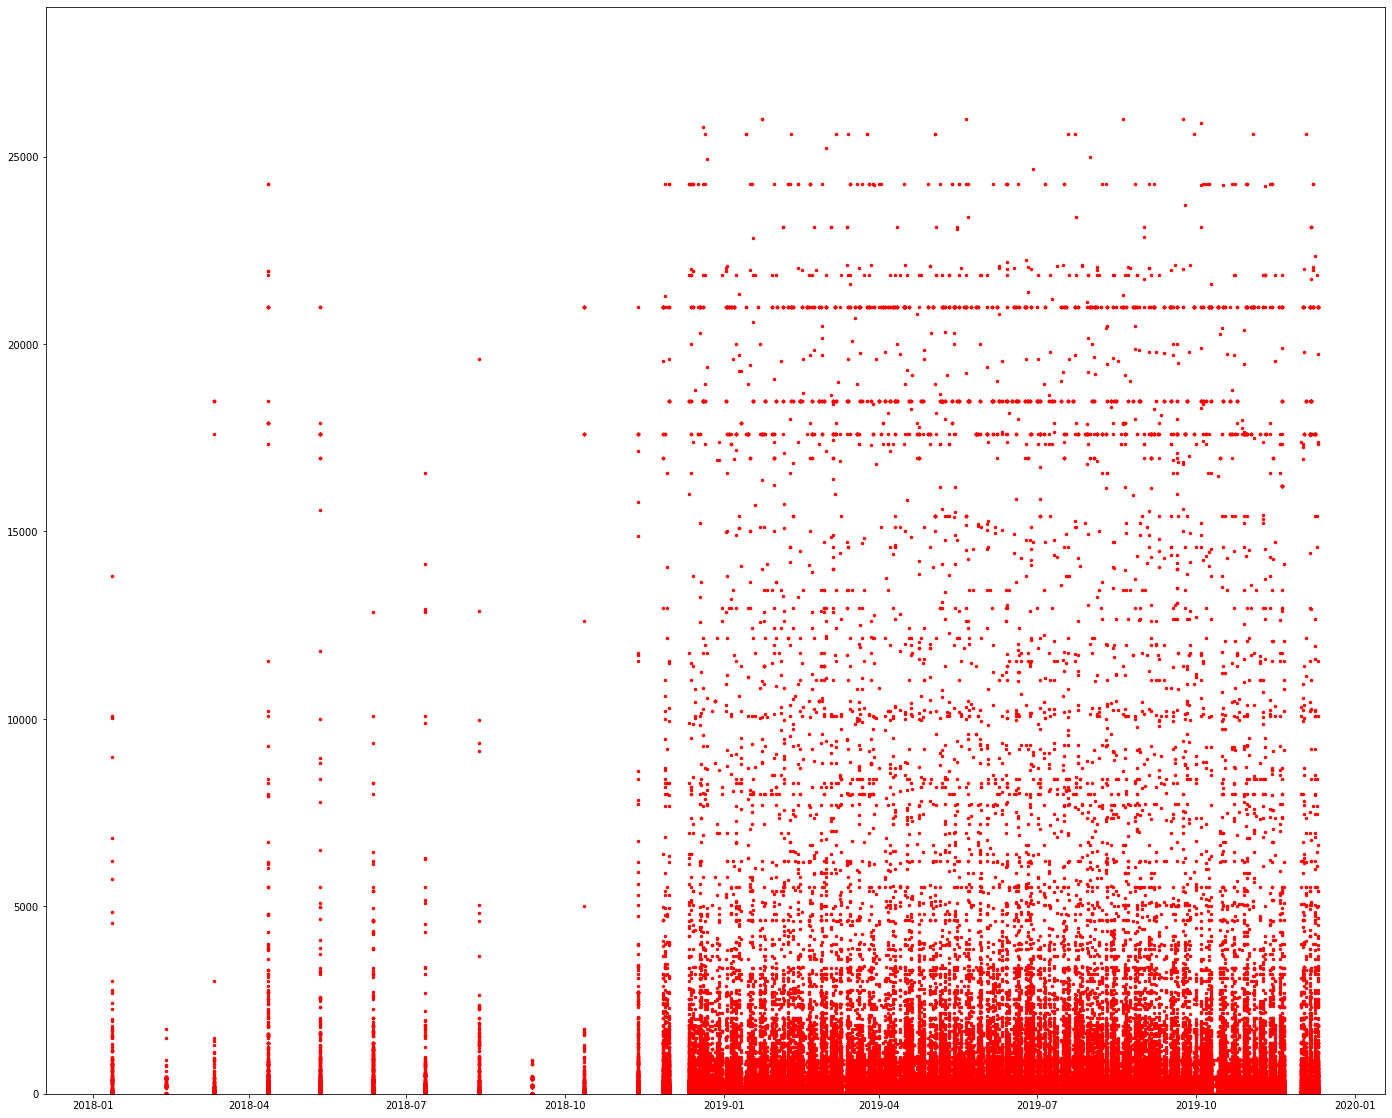

In [20]:
plt.figure(figsize=(24,20))
plt.scatter(dates, df_NETTO_GEWICHT_KG, s =6, c = 'red')
plt.ylim(0,29000)

In [21]:
df.head()

,LKP_SOLD_TO_CUST,LKP_ARTIKEL,NETTO_GEWICHT_KG,FACTUUR_DATUM
0,130603,100017,12.0,2019-11-06
1,130575,100017,84.0,2018-12-12
2,130603,100017,24.0,2018-12-12
3,130321,100017,300.0,2018-11-12
4,130603,100017,12.0,2019-07-06


In [22]:
df[df['NETTO_GEWICHT_KG']>29000].count()

LKP_SOLD_TO_CUST    6
LKP_ARTIKEL         6
NETTO_GEWICHT_KG    6
FACTUUR_DATUM       6
dtype: int64

In [23]:
df[df['NETTO_GEWICHT_KG']>29000]

,LKP_SOLD_TO_CUST,LKP_ARTIKEL,NETTO_GEWICHT_KG,FACTUUR_DATUM
17651,130070,953979,5300000.0,2018-07-12
59006,247644,100367,578000.0,2019-01-16
59022,247644,100367,578000.0,2019-10-01
59039,247644,100726,66000.0,2019-11-07
75991,131416,1122000,29808.0,2019-03-26
140785,130020,973371,220000.0,2019-03-21


In [24]:
df_high_Kg_values =  df['NETTO_GEWICHT_KG'] < 29000

In [25]:
df = df[df_high_Kg_values]

In [26]:
df.head()

,LKP_SOLD_TO_CUST,LKP_ARTIKEL,NETTO_GEWICHT_KG,FACTUUR_DATUM
0,130603,100017,12.0,2019-11-06
1,130575,100017,84.0,2018-12-12
2,130603,100017,24.0,2018-12-12
3,130321,100017,300.0,2018-11-12
4,130603,100017,12.0,2019-07-06


In [27]:
df.loc[df['NETTO_GEWICHT_KG'].idxmax()]

LKP_SOLD_TO_CUST                 130323
LKP_ARTIKEL                      755075
NETTO_GEWICHT_KG                  26000
FACTUUR_DATUM       2019-01-23 00:00:00
Name: 95660, dtype: object

In [28]:
df = df.reset_index(drop=True)
df.head()

,LKP_SOLD_TO_CUST,LKP_ARTIKEL,NETTO_GEWICHT_KG,FACTUUR_DATUM
0,130603,100017,12.0,2019-11-06
1,130575,100017,84.0,2018-12-12
2,130603,100017,24.0,2018-12-12
3,130321,100017,300.0,2018-11-12
4,130603,100017,12.0,2019-07-06


In [29]:
df.shape

(199393, 4)

# Analysing the product 100017 from 2018-01-12 to 2019-12-11

In [30]:
dfp_100017 = df.loc[df['LKP_ARTIKEL']==100017]
dfp_100017.head()

,LKP_SOLD_TO_CUST,LKP_ARTIKEL,NETTO_GEWICHT_KG,FACTUUR_DATUM
0,130603,100017,12.0,2019-11-06
1,130575,100017,84.0,2018-12-12
2,130603,100017,24.0,2018-12-12
3,130321,100017,300.0,2018-11-12
4,130603,100017,12.0,2019-07-06


In [31]:
dfp_100017.shape

(385, 4)

The product 100017 was order 385 times during all the data period.

In [32]:
dfp_100017.FACTUUR_DATUM.max()

Timestamp('2019-12-11 00:00:00')

This Date Format is: Year - Month - day

In [33]:
dfp_100017['FACTUUR_DATUM'].max()

Timestamp('2019-12-11 00:00:00')

In [34]:
dfp_100017['FACTUUR_DATUM'].min()

Timestamp('2018-01-12 00:00:00')

In [35]:
dfp_100017 = dfp_100017[['LKP_ARTIKEL','NETTO_GEWICHT_KG','FACTUUR_DATUM']]

In [36]:
dfp_100017.head()

,LKP_ARTIKEL,NETTO_GEWICHT_KG,FACTUUR_DATUM
0,100017,12.0,2019-11-06
1,100017,84.0,2018-12-12
2,100017,24.0,2018-12-12
3,100017,300.0,2018-11-12
4,100017,12.0,2019-07-06


In [37]:
dfp_100017.dtypes

LKP_ARTIKEL                  int64
NETTO_GEWICHT_KG           float64
FACTUUR_DATUM       datetime64[ns]
dtype: object

In [38]:
dfp_100017 = dfp_100017.groupby(['LKP_ARTIKEL','FACTUUR_DATUM']).sum()
dfp_100017.head()

NETTO_GEWICHT_KG
LKP_ARTIKEL FACTUUR_DATUM                  
100017      2018-01-12                114.0
            2018-03-12                 24.0
            2018-04-12                 12.0
            2018-05-12                 36.0
            2018-06-12                528.0

In [39]:
dfp_100017 = dfp_100017.reset_index(level=['FACTUUR_DATUM'])

In [40]:
dfp_100017.head()

,FACTUUR_DATUM,NETTO_GEWICHT_KG
LKP_ARTIKEL,,
100017,2018-01-12,114.0
100017,2018-03-12,24.0
100017,2018-04-12,12.0
100017,2018-05-12,36.0
100017,2018-06-12,528.0


In [41]:
dfp_100017 = dfp_100017.sort_values(by='FACTUUR_DATUM') 

In [42]:
dfp_100017.head()

,FACTUUR_DATUM,NETTO_GEWICHT_KG
LKP_ARTIKEL,,
100017,2018-01-12,114.0
100017,2018-03-12,24.0
100017,2018-04-12,12.0
100017,2018-05-12,36.0
100017,2018-06-12,528.0


(0, 900)

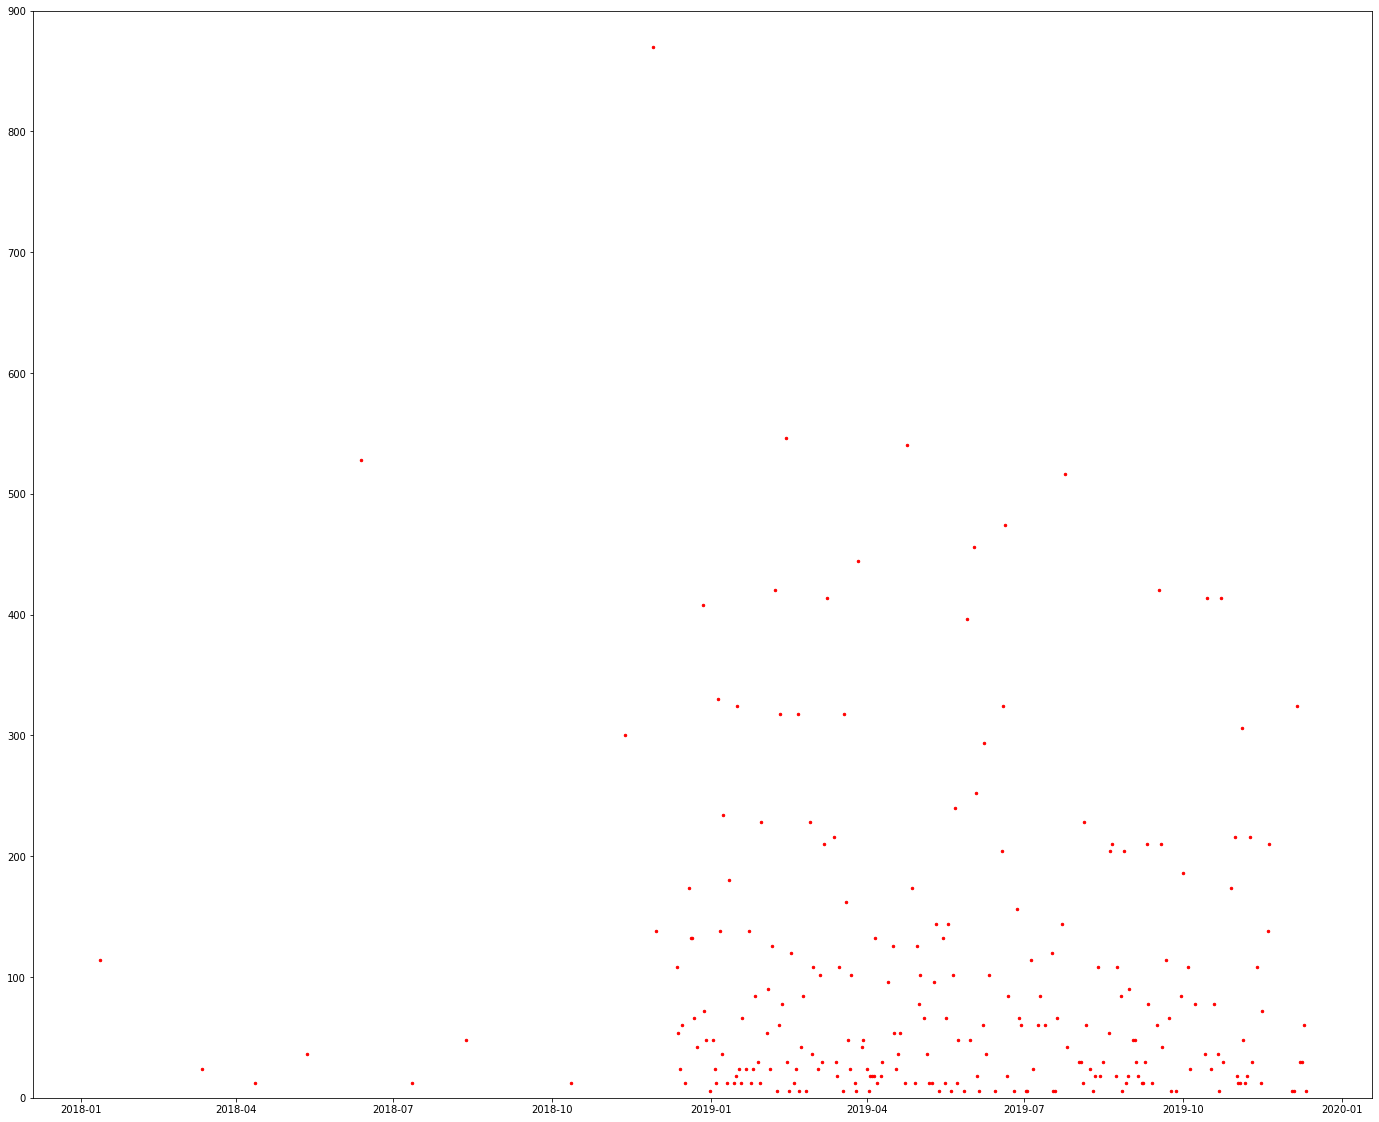

In [49]:
dfp_100017_FACTUUR_DATUM = dfp_100017["FACTUUR_DATUM"].tolist()
dfp_100017_NETTO_GEWICHT_KG = dfp_100017["NETTO_GEWICHT_KG"].tolist()
dfp_100017_dates = [pd.to_datetime(d) for d in dfp_100017_FACTUUR_DATUM]
plt.figure(figsize=(24,20))
plt.scatter(dfp_100017_dates, dfp_100017_NETTO_GEWICHT_KG, s =6, c = 'red')
plt.ylim(0,900)

In [44]:
dfp_100017.dtypes

FACTUUR_DATUM       datetime64[ns]
NETTO_GEWICHT_KG           float64
dtype: object

In [47]:
dfp_100017.to_csv("/Users/mac/Desktop/OrderPredictions/dfp_100017_file.csv")

In [48]:
dfp_100017['NETTO_GEWICHT_KG'].max()

870.0